**Laptop Price Analysis**

The original dataset was pretty compact with a lot of details in each column. The columns mostly
consisted of long strings of data, which was pretty human-readable and concise but for Machine Learning
algorithms to work more efficiently it's better to separate the different details into their own columns. After
doing so, 28 duplicate rows were exposed and removed with this dataset being the final result.



In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [94]:
train_df=pd.read_csv("/content/laptop_prices.csv")

In [95]:
train_df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [96]:
print("Rows: ",train_df.shape[0],",Columns: ",train_df.shape[1])

Rows:  1275 ,Columns:  23


In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

Totally we are having 22 features for Laptop Price Analysis.

In [98]:
train_df.dtypes

,0
Company,object
Product,object
TypeName,object
Inches,float64
Ram,int64
OS,object
Weight,float64
Price_euros,float64
Screen,object
ScreenW,int64


In [99]:
train_df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [100]:
train_df.describe(include="all")

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
count,1275,1275,1275,1275.000000,1275.000000,1275,1275.000000,1275.000000,1275,1275.000000,...,1275,1275,1275.000000,1275,1275.000000,1275.000000,1275,1275,1275,1275
unique,19,618,6,NaN,NaN,9,NaN,NaN,4,NaN,...,2,3,NaN,93,NaN,NaN,4,4,4,110
top,Dell,XPS 13,Notebook,NaN,NaN,Windows 10,NaN,NaN,Full HD,NaN,...,No,Intel,NaN,Core i5 7200U,NaN,NaN,SSD,No,Intel,HD Graphics 620
freq,291,30,707,NaN,NaN,1048,NaN,NaN,835,NaN,...,1258,1214,NaN,193,NaN,NaN,837,1067,704,279
mean,NaN,NaN,NaN,15.022902,8.440784,NaN,2.040525,1134.969059,NaN,1900.043922,...,NaN,NaN,2.302980,NaN,444.517647,176.069020,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.429470,5.097809,NaN,0.669196,700.752504,NaN,493.346186,...,NaN,NaN,0.503846,NaN,365.537726,415.960655,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,10.100000,2.000000,NaN,0.690000,174.000000,NaN,1366.000000,...,NaN,NaN,0.900000,NaN,8.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,14.000000,4.000000,NaN,1.500000,609.000000,NaN,1920.000000,...,NaN,NaN,2.000000,NaN,256.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,15.600000,8.000000,NaN,2.040000,989.000000,NaN,1920.000000,...,NaN,NaN,2.500000,NaN,256.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,15.600000,8.000000,NaN,2.310000,1496.500000,NaN,1920.000000,...,NaN,NaN,2.700000,NaN,512.000000,0.000000,NaN,NaN,NaN,NaN


In [101]:
train_df.duplicated().sum()

0

In [102]:
train_df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [103]:
train_df['Product'].value_counts()

,count
Product,
XPS 13,30
Inspiron 3567,25
250 G6,21
Vostro 3568,19
Legion Y520-15IKBN,19
...,...
VivoBook E201NA,1
Ideapad 520-15IKBR,1
Thinkpad X260,1


In [104]:
train_df['Inches'].value_counts()

,count
Inches,
15.6,647
14.0,193
17.3,164
13.3,160
12.5,39
11.6,31
12.0,6
13.5,6
13.9,6


In [105]:
train_df['TypeName'].value_counts()

,count
TypeName,
Notebook,707
Gaming,205
Ultrabook,194
2 in 1 Convertible,117
Workstation,29
Netbook,23


In [106]:
train_df['Ram'].value_counts()

,count
Ram,
8,613
4,367
16,198
6,35
12,25
32,17
2,16
24,3
64,1


In [107]:
train_df['OS'].value_counts()

,count
OS,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [108]:
print(train_df['Weight'].value_counts())

Weight
2.20    120
2.10     58
2.00     45
2.40     42
2.50     38
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: count, Length: 171, dtype: int64


In [109]:
train_df['Price_euros'].value_counts()

,count
Price_euros,
1099.0,14
1799.0,14
1499.0,12
1199.0,11
1299.0,11
...,...
2090.0,1
304.0,1
759.0,1


In [110]:
train_df['Screen'].value_counts()

,count
Screen,
Full HD,835
Standard,369
4K Ultra HD,43
Quad HD+,28


**DATA VISUALIZATION**

In [111]:
fig=px.histogram(train_df,x='Company', title='Distribution of Company')
fig.show()

Among all company distributions HP , DEll , Levono are the top three laptop follwed by MSI, Toshiba and Apple .

In [112]:
fig = px.histogram(train_df,x='Product', title='Distribution of Product')
fig.show()

This is the Visual representation of the Products.

In [113]:
fig = px.histogram(train_df,x='OS', title='Distribution of Operating System')
fig.show()

As already we know Max OS Distribution is Windows 10.

In [114]:
fig = px.histogram(train_df,x='Screen', title='Distribution of Screen')
fig.show()

People are preferring more Full HD followed by Standard.

In [115]:
fig = px.histogram(train_df,x='Touchscreen', title='Distribution of Touch Screen')
fig.show()

BY this we can say that mostly people are not using Touch Screen.

In [116]:
fig = px.histogram(train_df,x='IPSpanel', title='Distribution of IPSpanel')
fig.show()

Only 357 are using IPSpannel of total 975 count.

In [117]:
fig = px.histogram(train_df,x='RetinaDisplay', title='Distribution of Retina Display')
fig.show()

The NO RetinaDisplay is selling huge when compared to RetinaDisplay.

In [118]:
fig = px.histogram(train_df,x='CPU_company', title='Distribution of CPU_company')
fig.show()

The Intel CPU Distribution is huge when compared to AMD and Samsung.

In [119]:
fig = px.histogram(train_df,x='CPU_model', title='Distribution of CPU_model')
fig.show()

Core i7 demand is huge for CPU model among all CPU models.

In [120]:
fig = px.histogram(train_df,x='PrimaryStorageType', title='Distribution of Primary Storage Type')
fig.show()

SSD Primary Strage usage is high followed by HDD , Flash Storage and Hybrid.

In [121]:
fig = px.histogram(train_df,x='SecondaryStorageType', title='Distribution of Secondary Storage Type')
fig.show()

In [122]:
fig = px.histogram(train_df,x='GPU_company', title='Distribution of GPU_company')
fig.show()

GPU_Company is mostly using Intel .

In [123]:
fig = px.histogram(train_df,x='GPU_model', title='Distribution of GPU_model')
fig.show()

Identifying Outliers

In [124]:
def GroupByOutliers(df, nameColumns, thresholdNumber):
    nameColumnsNew = nameColumns
    count_series = df[nameColumns].value_counts()
    threshold = thresholdNumber
    rare_values = count_series[count_series < threshold].index.to_list()
    outliers = df[nameColumns].apply(lambda x: x if x not in rare_values else 'Other')
    fig = px.histogram(df, x=nameColumnsNew, title='Distribution of ' + nameColumns)
    fig.show()

In [125]:
GroupByOutliers(train_df, 'Company', 10)

In [126]:
GroupByOutliers(train_df, 'TypeName', 50)

Notebook is hig among all Type followed by Gaming.

In [127]:
GroupByOutliers(train_df, 'OS', 50)

In [128]:
GroupByOutliers(train_df, 'Screen', 50)

In [129]:
GroupByOutliers(train_df, 'CPU_company', 100)

In [130]:
GroupByOutliers(train_df, 'CPU_model', 2)

In [131]:
GroupByOutliers(train_df, 'PrimaryStorageType', 10)

In [132]:
GroupByOutliers(train_df, 'GPU_company', 10)

In [133]:
GroupByOutliers(train_df, 'GPU_model', 10)

Handling numeric data

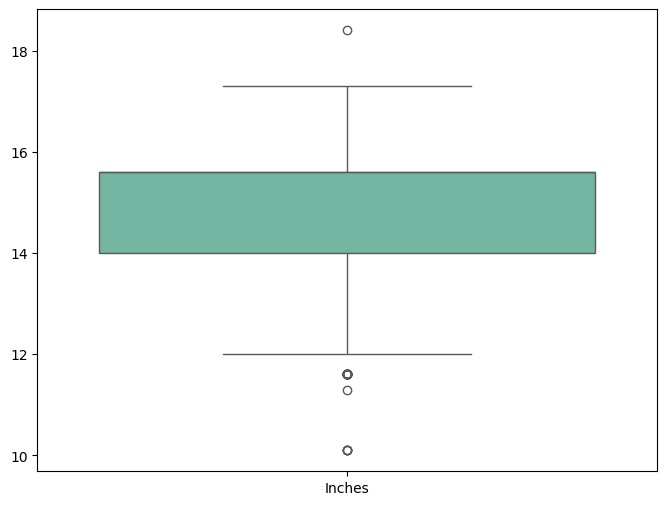

In [134]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = [train_df['Inches']], palette = 'Set2')
plt.xticks([0], ['Inches'])
plt.show()

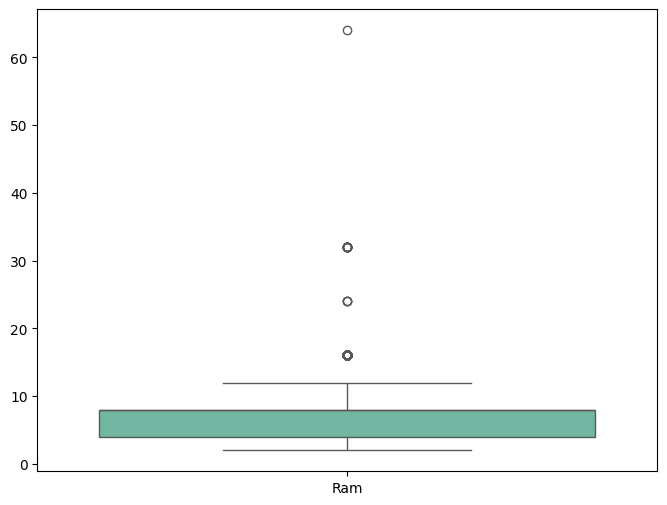

In [135]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = [train_df['Ram']], palette = 'Set2')
plt.xticks([0], ['Ram'])
plt.show()

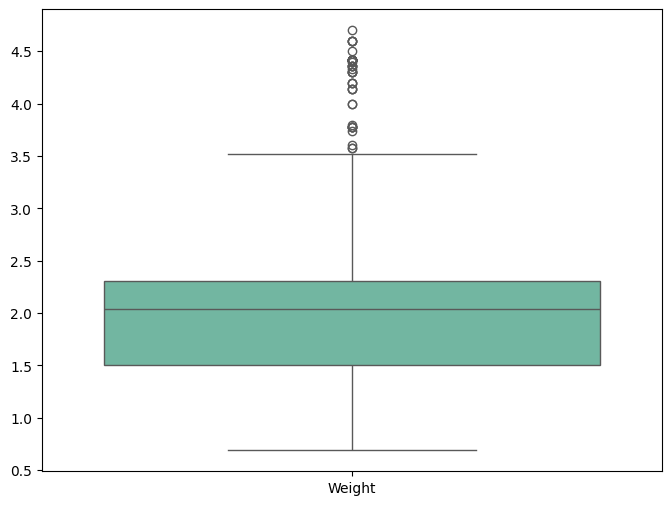

In [136]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = [train_df['Weight']], palette = 'Set2')
plt.xticks([0], ['Weight'])
plt.show()

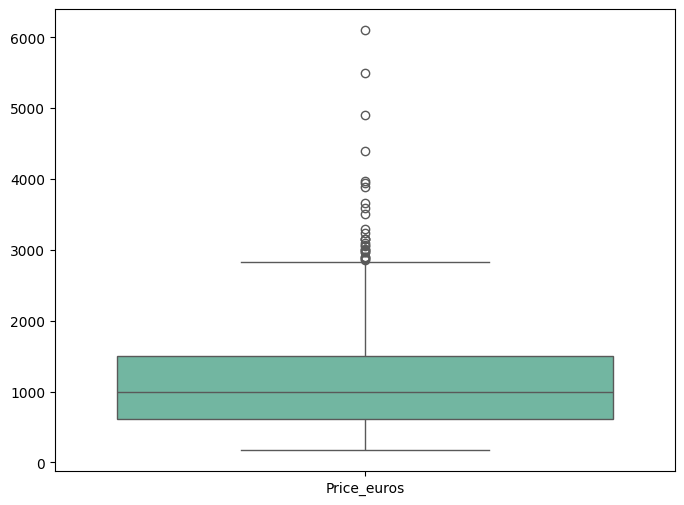

In [137]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = [train_df['Price_euros']], palette = 'Set2')
plt.xticks([0], ['Price_euros'])
plt.show()

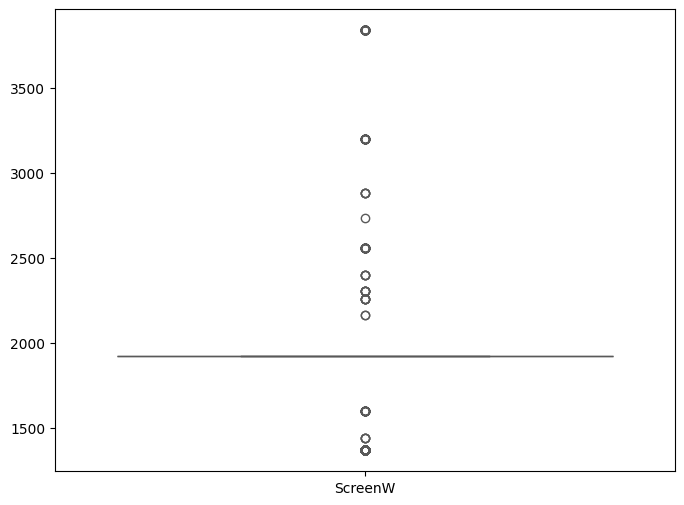

In [138]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = [train_df['ScreenW']], palette = 'Set2')
plt.xticks([0], ['ScreenW'])
plt.show()

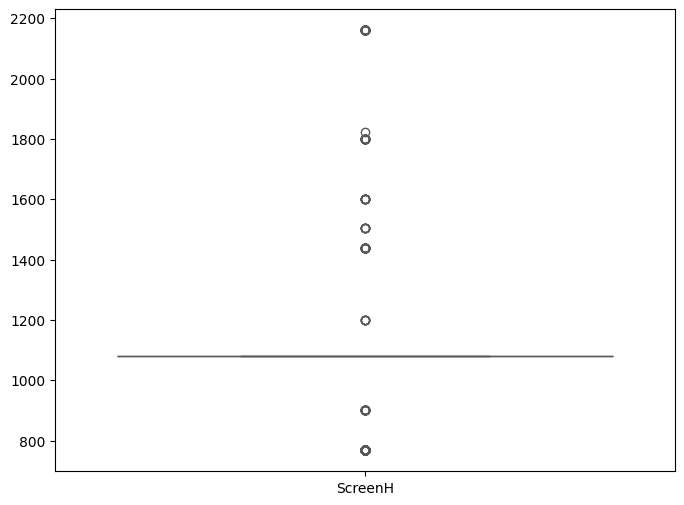

In [139]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = [train_df['ScreenH']], palette = 'Set2')
plt.xticks([0], ['ScreenH'])
plt.show()

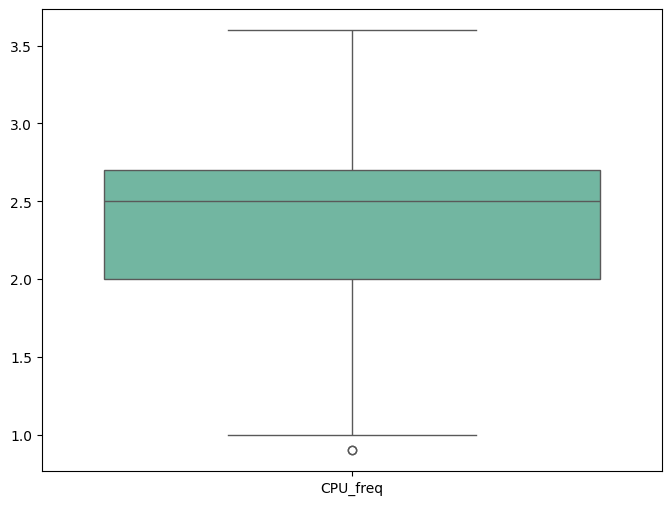

In [140]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = [train_df['CPU_freq']], palette = 'Set2')
plt.xticks([0], ['CPU_freq'])
plt.show()

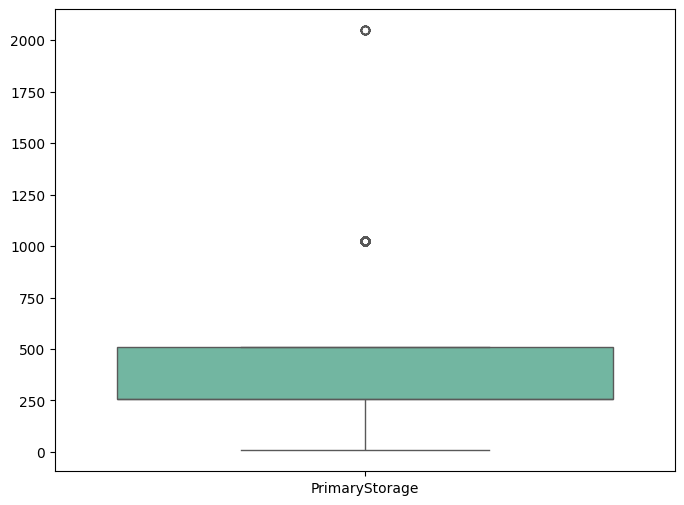

In [141]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = [train_df['PrimaryStorage']], palette = 'Set2')
plt.xticks([0], ['PrimaryStorage'])
plt.show()

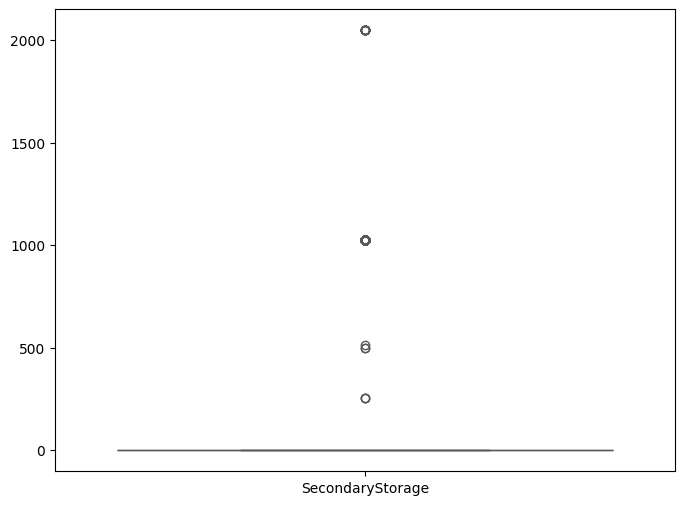

In [142]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = [train_df['SecondaryStorage']], palette = 'Set2')
plt.xticks([0], ['SecondaryStorage'])
plt.show()

Removing Outliers

In [143]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return outliers[column]


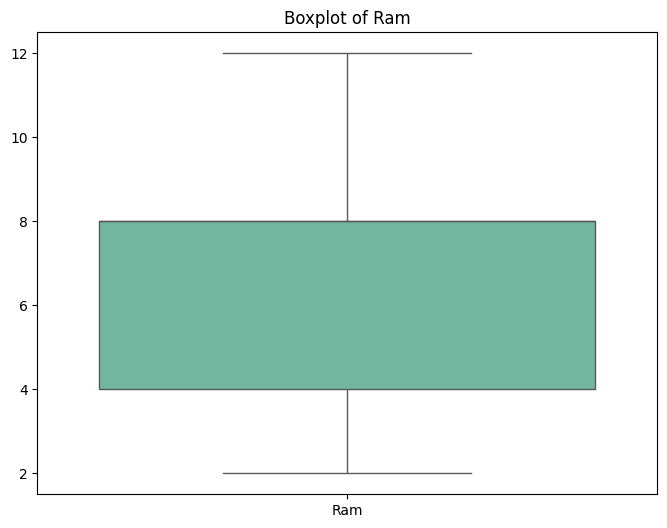

In [144]:
column = 'Ram'
plt.figure(figsize=(8, 6))
sns.boxplot(data=[detect_outliers(train_df, column)], palette='Set2')
plt.xticks([0], [column])
plt.title('Boxplot of ' + column)
plt.show()

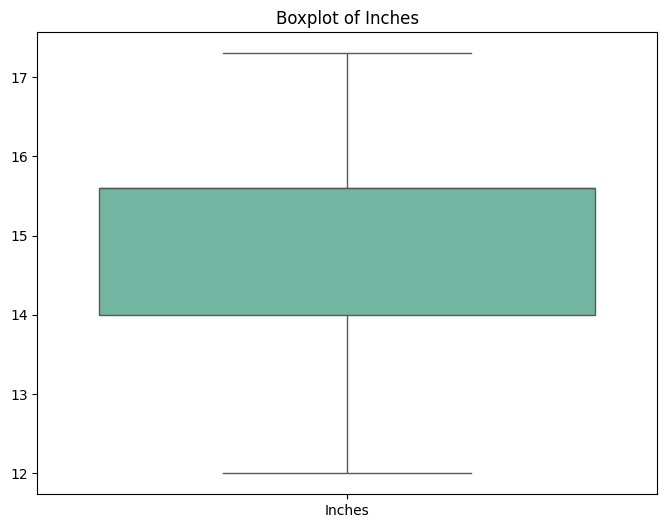

In [145]:
column = 'Inches'
plt.figure(figsize=(8, 6))
sns.boxplot(data=[detect_outliers(train_df, column)], palette='Set2')
plt.xticks([0], [column])
plt.title('Boxplot of ' + column)
plt.show()

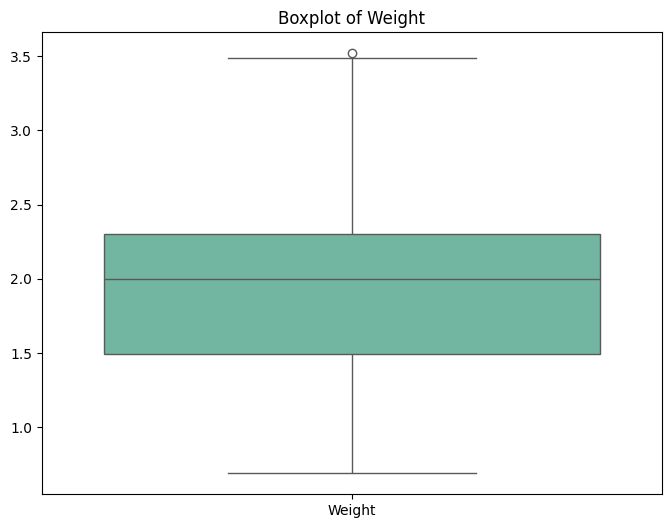

In [146]:
column = 'Weight'
plt.figure(figsize=(8, 6))
sns.boxplot(data=[detect_outliers(train_df, column)], palette='Set2')
plt.xticks([0], [column])
plt.title('Boxplot of ' + column)
plt.show()

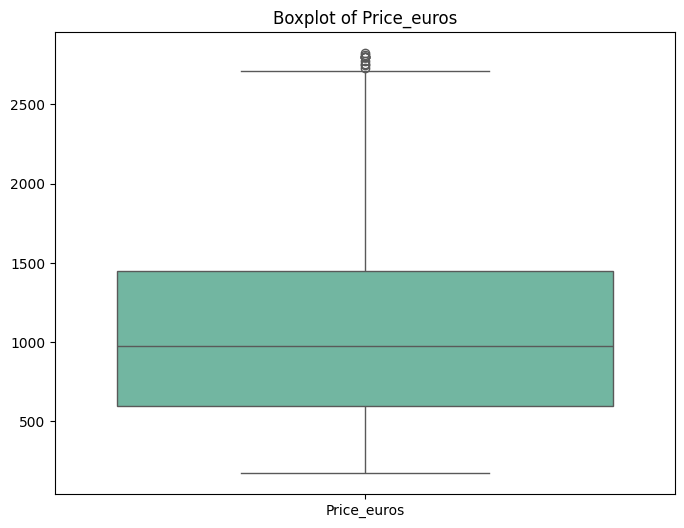

In [147]:
column = 'Price_euros'
plt.figure(figsize=(8, 6))
sns.boxplot(data=[detect_outliers(train_df, column)], palette='Set2')
plt.xticks([0], [column])
plt.title('Boxplot of ' + column)
plt.show()

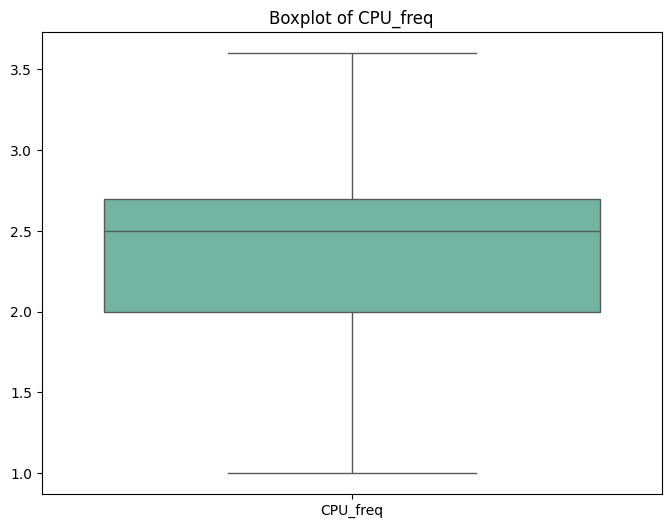

In [148]:
column = 'CPU_freq'
plt.figure(figsize=(8, 6))
sns.boxplot(data=[detect_outliers(train_df, column)], palette='Set2')
plt.xticks([0], [column])
plt.title('Boxplot of ' + column)
plt.show()

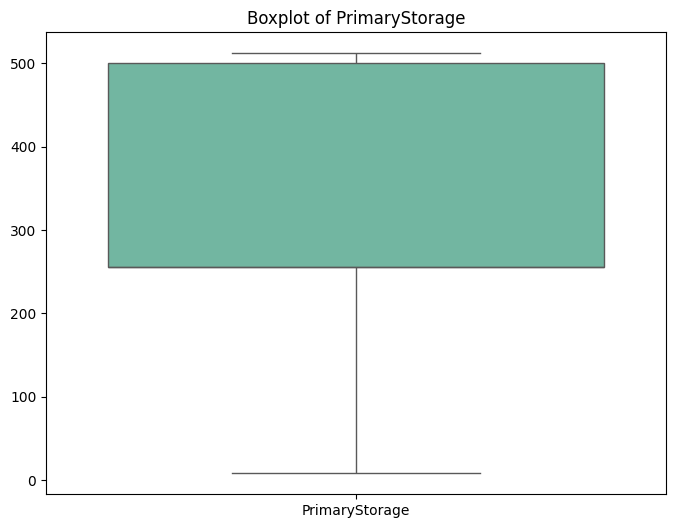

In [149]:
column = 'PrimaryStorage'
plt.figure(figsize=(8, 6))
sns.boxplot(data=[detect_outliers(train_df, column)], palette='Set2')
plt.xticks([0], [column])
plt.title('Boxplot of ' + column)
plt.show()

Data Analysis

**SCATTER PLOT**

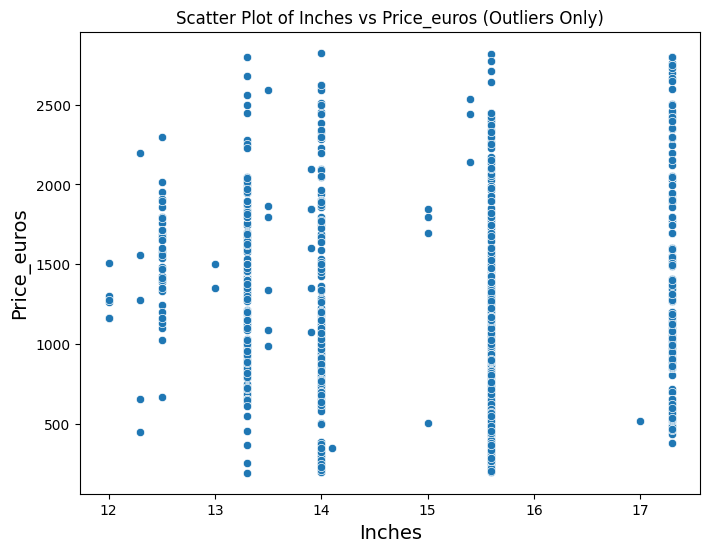

In [150]:
x_outliers = detect_outliers(train_df, 'Inches')
y_outliers = detect_outliers(train_df, 'Price_euros')


plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_outliers, y=y_outliers)
plt.xlabel('Inches', fontsize=14, color='k')
plt.ylabel("Price_euros", fontsize=14, color='k')
plt.title("Scatter Plot of Inches vs Price_euros (Outliers Only)")
plt.show()

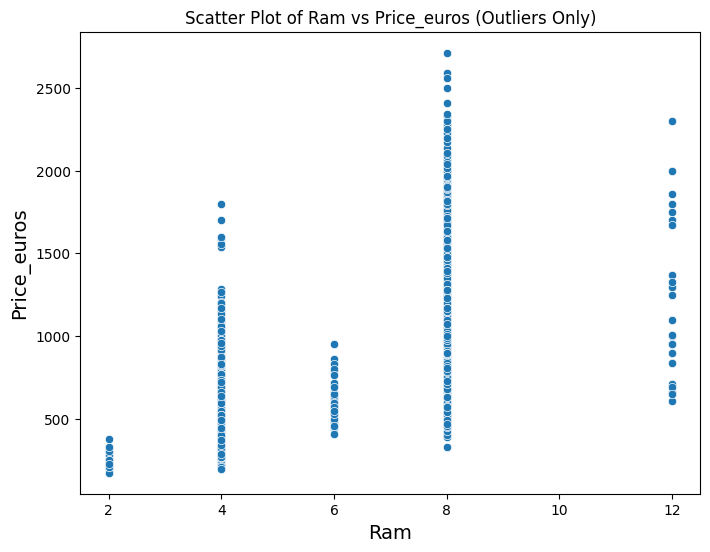

In [151]:
x_outliers = detect_outliers(train_df, 'Ram')
y_outliers = detect_outliers(train_df, 'Price_euros')


plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_outliers, y=y_outliers)
plt.xlabel('Ram', fontsize=14, color='k')
plt.ylabel("Price_euros", fontsize=14, color='k')
plt.title("Scatter Plot of Ram vs Price_euros (Outliers Only)")
plt.show()

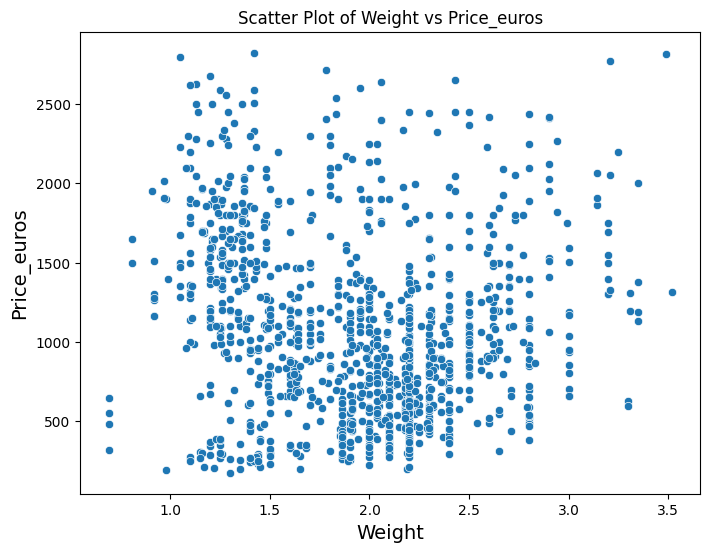

In [152]:
x_outliers = detect_outliers(train_df, 'Weight')
y_outliers = detect_outliers(train_df, 'Price_euros')


plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_outliers, y=y_outliers)
plt.xlabel('Weight', fontsize=14, color='k')
plt.ylabel("Price_euros", fontsize=14, color='k')
plt.title("Scatter Plot of Weight vs Price_euros")
plt.show()

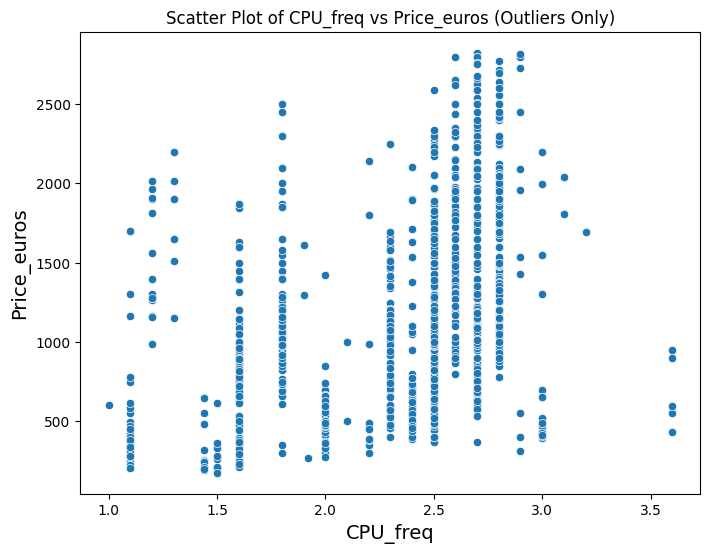

In [153]:
x_outliers = detect_outliers(train_df, 'CPU_freq')
y_outliers = detect_outliers(train_df, 'Price_euros')


plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_outliers, y=y_outliers)
plt.xlabel('CPU_freq', fontsize=14, color='k')
plt.ylabel("Price_euros", fontsize=14, color='k')
plt.title("Scatter Plot of CPU_freq vs Price_euros (Outliers Only)")
plt.show()

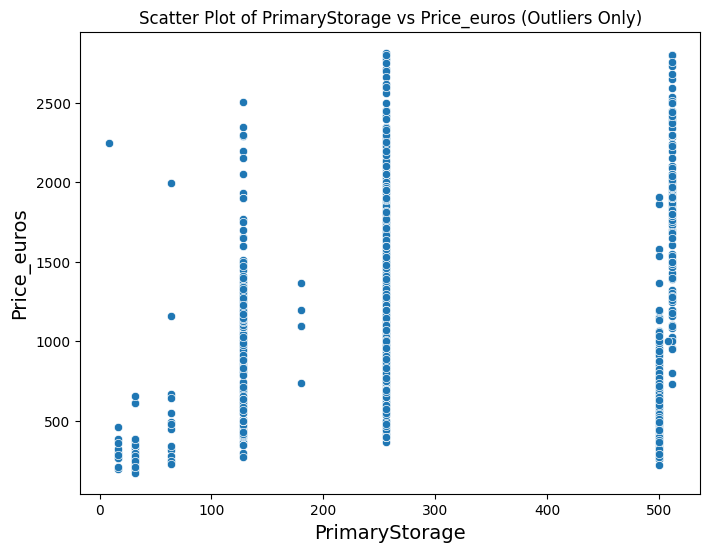

In [154]:
x_outliers = detect_outliers(train_df, 'PrimaryStorage')
y_outliers = detect_outliers(train_df, 'Price_euros')

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_outliers, y=y_outliers)
plt.xlabel('PrimaryStorage', fontsize=14, color='k')
plt.ylabel("Price_euros", fontsize=14, color='k')
plt.title("Scatter Plot of PrimaryStorage vs Price_euros (Outliers Only)")
plt.show()

In [155]:
def suphanbo(df, column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # Tạo 1 hàng, 2 cột, chọn đồ thị đầu tiên
    sns.histplot(train_df[column], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()  # Tối ưu khoảng cách giữa các biểu đồ
    plt.show()


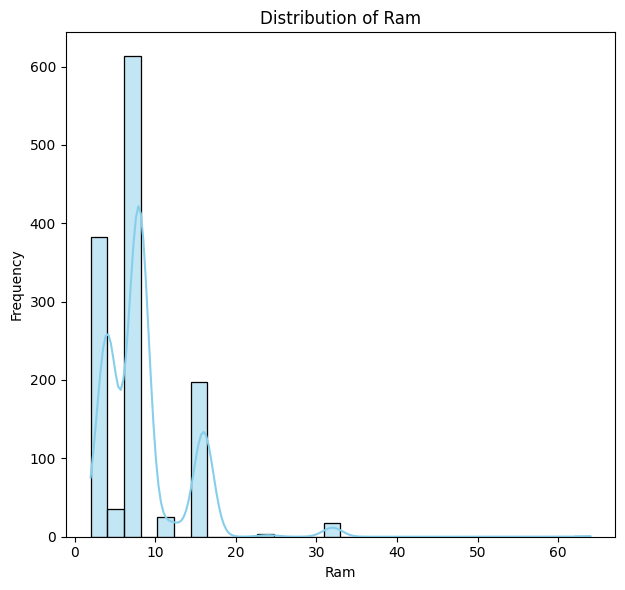

In [156]:
suphanbo(train_df, 'Ram')

In [157]:
company = train_df.groupby("Company")
company

<Axes: xlabel='Company'>

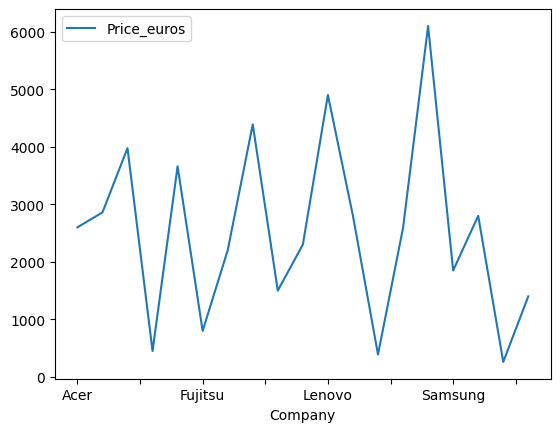

In [158]:
company.max()[['Product', 'Price_euros']].plot()

<Axes: xlabel='Company'>

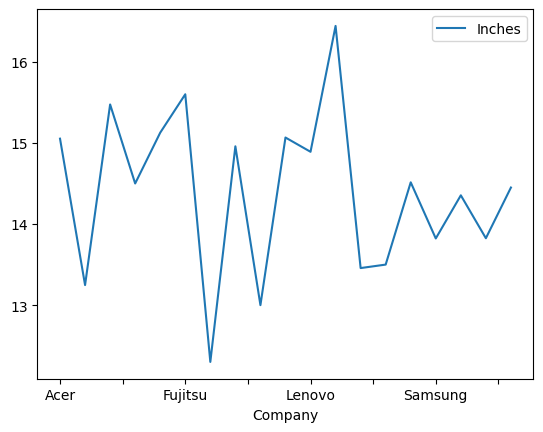

In [159]:
company.mean(numeric_only=True)[['Inches']].plot()

<Axes: xlabel='Company'>

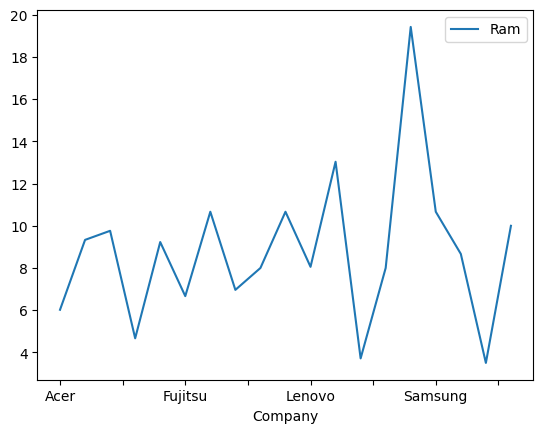

In [160]:
company.mean(numeric_only=True)[['Ram']].plot()

<Axes: xlabel='Company'>

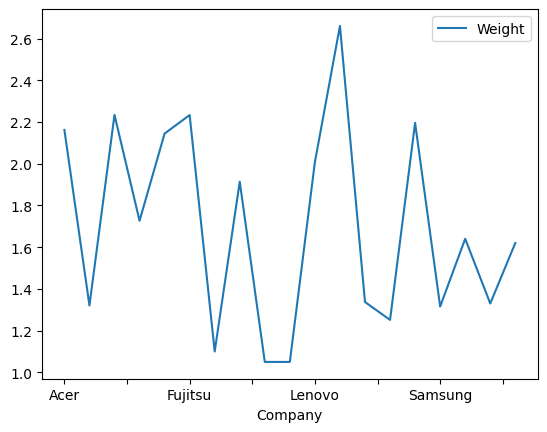

In [161]:
company.mean(numeric_only=True)[['Weight']].plot()

In [162]:
pivot = pd.pivot_table(index='TypeName', columns='Screen', data=train_df, values='Price_euros', aggfunc='count')
pivot

Screen,4K Ultra HD,Full HD,Quad HD+,Standard
TypeName,,,,
2 in 1 Convertible,7.0,76.0,7.0,27.0
Gaming,13.0,190.0,NaN,2.0
Netbook,NaN,4.0,NaN,19.0
Notebook,11.0,418.0,3.0,275.0
Ultrabook,8.0,123.0,18.0,45.0
Workstation,4.0,24.0,NaN,1.0


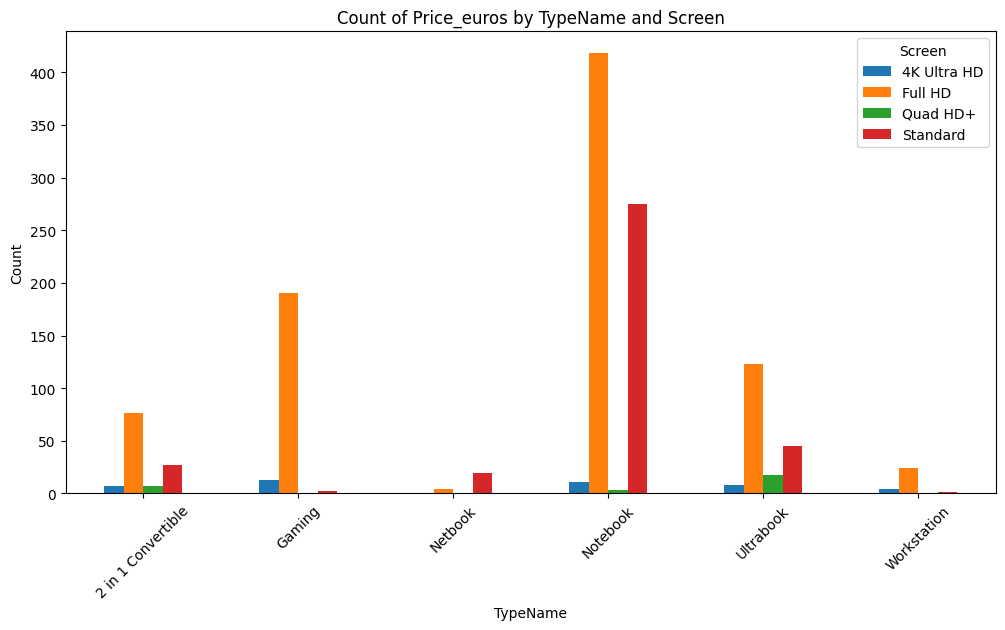

In [163]:
pivot.plot(kind='bar', figsize=(12,6))
plt.title("Count of Price_euros by TypeName and Screen")
plt.xlabel('TypeName')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Screen')
plt.show()

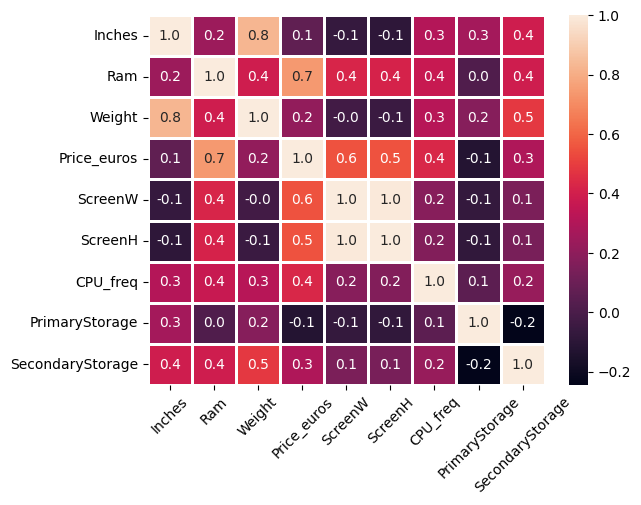

In [164]:
sns.heatmap(train_df.corr(numeric_only=True), annot=True, fmt='.1f', linewidths=2)
plt.xticks(rotation=45)
plt.show()

heatmap for features.

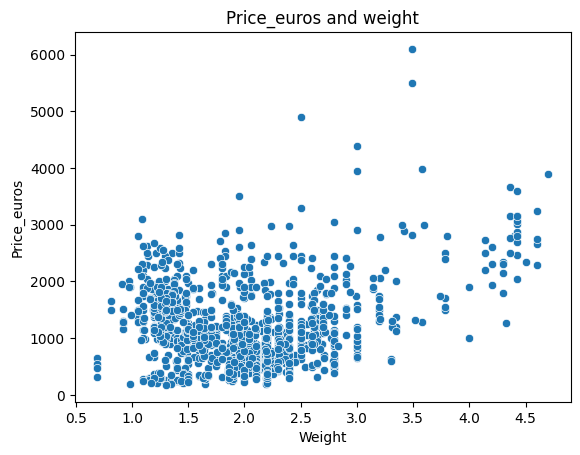

In [165]:
sns.scatterplot(train_df, x="Weight", y="Price_euros")
plt.title("Price_euros and weight")
plt.show()

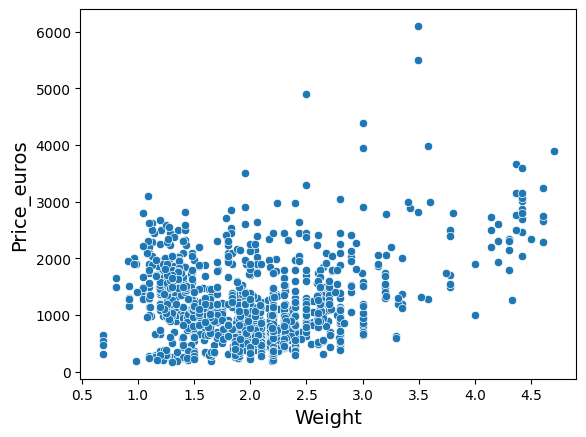

In [166]:
sns.scatterplot(x='Weight', y='Price_euros',data=train_df)
plt.xlabel('Weight', fontsize=14, c='k')
plt.ylabel("Price_euros", fontsize=14, c='k')
plt.show()

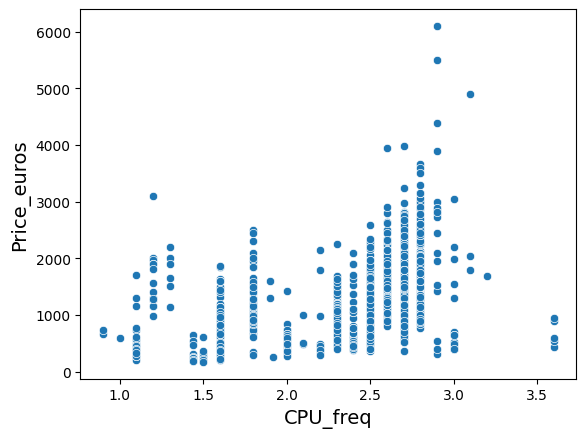

In [167]:
sns.scatterplot(x='CPU_freq', y='Price_euros',data=train_df)
plt.xlabel('CPU_freq', fontsize=14, c='k')
plt.ylabel("Price_euros", fontsize=14, c='k')
plt.show()

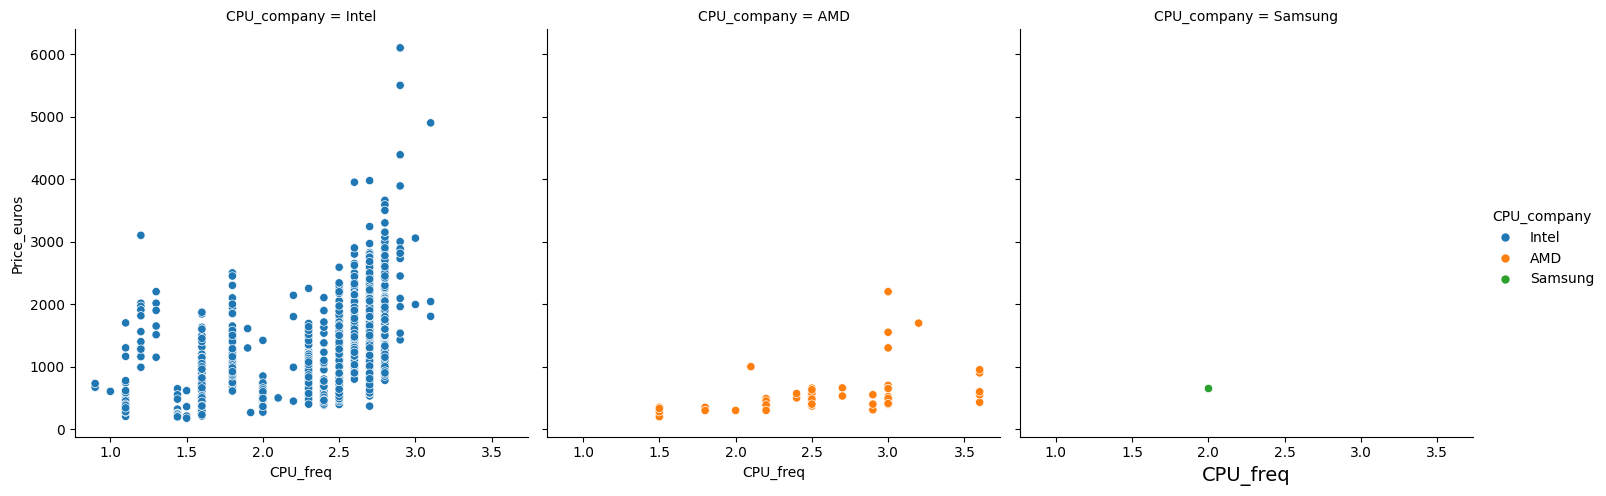

In [168]:
sns.relplot(x='CPU_freq', y='Price_euros', data=train_df, hue='CPU_company', col='CPU_company', col_wrap=3)
plt.xlabel('CPU_freq', fontsize=14,  c='k')
plt.ylabel('Price_euros', fontsize=14, c='k')
plt.show()

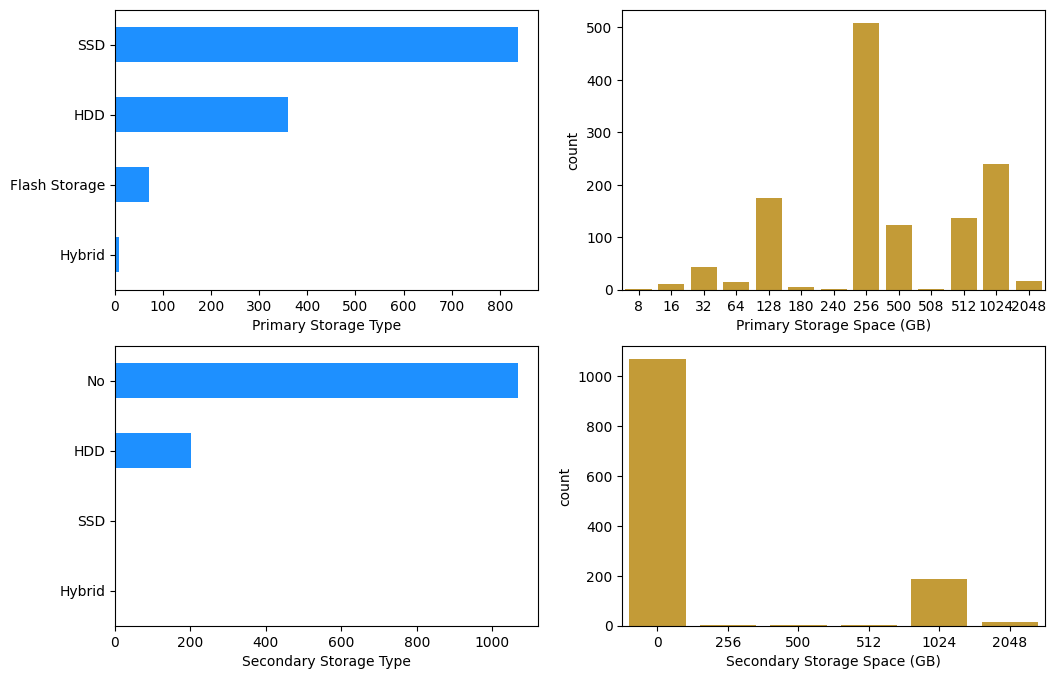

In [169]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
train_df['PrimaryStorageType'].value_counts().sort_values(ascending=True).plot(kind='barh', color='dodgerblue')
plt.xlabel('Primary Storage Type')
plt.ylabel('')
plt.subplot(2, 2, 2)
sns.countplot(train_df, x='PrimaryStorage',color='goldenrod')
plt.xlabel('Primary Storage Space (GB)')
plt.subplot(2, 2, 3)

train_df['SecondaryStorageType'].value_counts().sort_values(ascending=True).plot(kind='barh', color ='dodgerblue')
plt.xlabel('Secondary Storage Type')
plt.ylabel('')
plt.subplot(2, 2, 4)
sns.countplot(train_df, x='SecondaryStorage',color='goldenrod')
plt.xlabel('Secondary Storage Space (GB)')

plt.show()

In [170]:
train_df.columns.unique()

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [171]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [172]:
le = LabelEncoder()
train_df['Company'] = le.fit_transform(train_df['Company'])
train_df['Product'] = le.fit_transform(train_df['Product'])
train_df['TypeName'] = le.fit_transform(train_df['TypeName'])
train_df['OS'] = le.fit_transform(train_df['OS'])
train_df['Screen'] = le.fit_transform(train_df['Screen'])
train_df['Touchscreen'] = le.fit_transform(train_df['Touchscreen'])
train_df['IPSpanel'] = le.fit_transform(train_df['IPSpanel'])
train_df['RetinaDisplay'] = le.fit_transform(train_df['RetinaDisplay'])
train_df['CPU_company'] = le.fit_transform(train_df['CPU_company'])
train_df['CPU_model'] = le.fit_transform(train_df['CPU_model'])
train_df[ 'PrimaryStorageType'] = le.fit_transform(train_df[ 'PrimaryStorageType'])
train_df['SecondaryStorageType'] = le.fit_transform(train_df['SecondaryStorageType'])
train_df['GPU_company'] = le.fit_transform(train_df['GPU_company'])
train_df['GPU_model'] = le.fit_transform(train_df['GPU_model'])

In [173]:
y = train_df['Price_euros']
x = train_df.drop('Price_euros',axis=1)

In [174]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=45)

In [175]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [176]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**LINEAR REGRESSION**

In [177]:
# Model Building - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.6992596278756551

In [178]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f'R-squared: {r2}')

Mean Squared Error: 149743.97878167167
Root Mean Squared Error (RMSE): 386.9676714942369
R-squared: 0.6992596278756551


In [179]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f'R-squared: {r2}')

Mean Squared Error: 149743.97878167167
Root Mean Squared Error (RMSE): 386.9676714942369
R-squared: 0.6992596278756551


**RANDOM FOREST**

In [180]:
from sklearn.ensemble import RandomForestRegressor

In [181]:
# Model Building - Random Forest Regression
rf = RandomForestRegressor(n_estimators = 700)
model = rf.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.8569378734528863

In [182]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f'R-squared: {r2}')

Mean Squared Error: 71233.17661279724
Root Mean Squared Error (RMSE): 266.89544134884966
R-squared: 0.8569378734528863


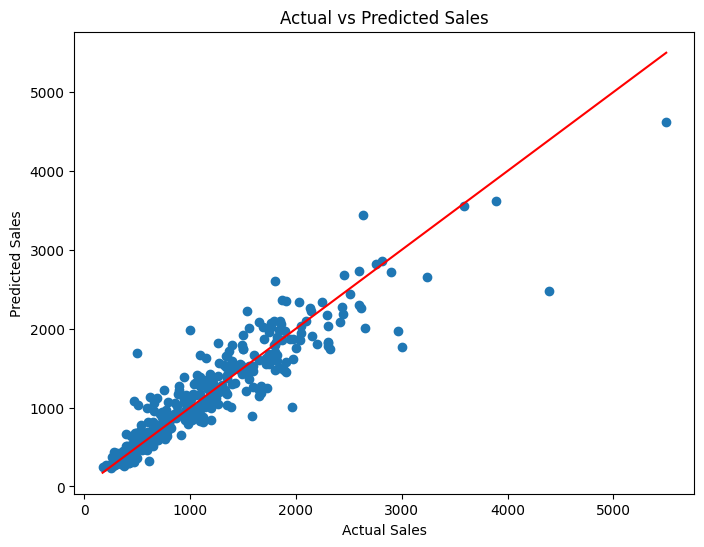

In [183]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [184]:
feature_importance = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
print(feature_importance)

Ram                     0.555936
Weight                  0.097510
Product                 0.061105
TypeName                0.047173
CPU_freq                0.041742
CPU_model               0.036136
GPU_model               0.029240
PrimaryStorage          0.020622
ScreenW                 0.016401
Inches                  0.015964
Company                 0.015639
Screen                  0.014997
OS                      0.011382
ScreenH                 0.011108
IPSpanel                0.006500
Touchscreen             0.005906
PrimaryStorageType      0.004900
SecondaryStorageType    0.003329
GPU_company             0.002304
SecondaryStorage        0.001739
CPU_company             0.000246
RetinaDisplay           0.000121
dtype: float64


Among all 22 features Ram is having high importance for features follwed by Weight and least feature importance is given to RetinaDisplay.

**INSIGHTS:**

The linear regression model achieved an R-squared value of 0.6992596278756551, indicating the proportion of variance explained by the model.

The random forest regression model achieved an R-squared value of 0.8521217075896228, indicating the proportion of variance explained by the model.

Among all 22 features Ram is having high importance for features follwed by Weight and least feature importance is given to RetinaDisplay.